In [17]:
# %% [markdown]
# # **SFO ÌîÑÎ°úÏ†ùÌä∏: ÌîåÎùºÏä§Ìã± ÏÇ¨Ï∂úÏÑ±Ìòï Ï†úÌíà ÏàòÏöî ÏòàÏ∏° Î™®Îç∏ Í∞úÎ∞ú (ÏûêÎèôÏ∞® Îç∞Ïù¥ÌÑ∞ Ï†úÏô∏ Î≤ÑÏ†Ñ)**
#
# ## 0. ÌôòÍ≤Ω ÏÑ§Ï†ï Î∞è ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏

# %%
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb
import optuna
import shap # SHAP Î∂ÑÏÑùÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ÎîîÏä§ÌîåÎ†àÏù¥ ÏÑ§Ï†ï (Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï†ÑÏ≤¥ Ïª¨Îüº Î∞è ÎÇ¥Ïö© ÌôïÏù∏Ïö©)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 100)

# matplotlib ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (ÌïÑÏöîÏãú)
plt.rcParams['font.family'] = 'Malgun Gothic' # Windows Í∏∞Ï§Ä
# plt.rcParams['font.family'] = 'AppleGothic' # Mac Í∏∞Ï§Ä
plt.rcParams['axes.unicode_minus'] = False # ÏùåÏàò Î∂ÄÌò∏ Íπ®Ïßê Î∞©ÏßÄ

print("--- [ÌôòÍ≤Ω ÏÑ§Ï†ï Î∞è ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏ ÏôÑÎ£å] ---")

--- [ÌôòÍ≤Ω ÏÑ§Ï†ï Î∞è ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏ ÏôÑÎ£å] ---


In [18]:
# %% [markdown]
# ## 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è ÏàòÎèô ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅ
# - ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Î•º Î°úÎìúÌïòÍ≥†, ÎÇ†Ïßú/ÏãúÍ∞Ñ Í∏∞Î∞ò ÌîºÏ≤ò, Lag/Rolling Mean ÌîºÏ≤ò, Î≤îÏ£ºÌòï Ïù∏ÏΩîÎî© Îì±ÏùÑ ÏàòÌñâÌï©ÎãàÎã§.
# - **(Ï£ºÏùò: ÏûêÎèôÏ∞® ÏÇ∞ÏóÖ Îç∞Ïù¥ÌÑ∞ ÌÜµÌï© Î∂ÄÎ∂ÑÏùÄ Ïù¥ ÏΩîÎìúÏóêÏÑú Ï†úÏô∏Îê©ÎãàÎã§.)**

# %%
print("\n--- [1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è ÏàòÎèô ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅ ÏãúÏûë] ---")

# --- 1.1 Îç∞Ïù¥ÌÑ∞ Î°úÎìú ---
# --- [ÏàòÏ†ï ÌïÑÏöî] ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÌååÏùº Í≤ΩÎ°úÎ•º ÏÇ¨Ïö©ÏûêÎãòÏùò Ïã§Ï†ú Í≤ΩÎ°úÎ°ú Î∞îÍøîÏ£ºÏÑ∏Ïöî ---
raw_data_path = r"C:\career\test_kmat\test\3. ÏÇ¨Ï∂úÏÑ±Ìòï Í≥µÍ∏âÎßùÏµúÏ†ÅÌôî AI Îç∞Ïù¥ÌÑ∞ÏÖã.csv" # ÏòàÏãú Í≤ΩÎ°ú
# --- [ÏàòÏ†ï ÌïÑÏöî] ---

df = None
try:
    if os.path.exists(raw_data_path):
        df = pd.read_csv(raw_data_path)
        print(f"1.1 ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å (shape: {df.shape})")
        print("   Ïª¨Îüº: ", df.columns.tolist())
        print(df.head())
    else:
        raise FileNotFoundError(f"'{raw_data_path}' ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
except Exception as e:
    print(f"üö® ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú Ï§ë Ïò§Î•ò: {e}")

if df is None:
    print("üö® ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìúÏóê Ïã§Ìå®ÌïòÏó¨ Îã§Ïùå Îã®Í≥ÑÎ°ú ÏßÑÌñâÌï† Ïàò ÏóÜÏäµÎãàÎã§.")
else:
    df_manual_features = df.copy() # ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅÏùÑ ÏúÑÌïú Î≥µÏÇ¨Î≥∏ ÏÉùÏÑ±

    # --- [KeyError: 'Date' Ìï¥Í≤∞ÏùÑ ÏúÑÌïú ÏàòÏ†ï] ---
    # ÏõêÎ≥∏ ÎÇ†Ïßú Ïª¨Îüº Ïù¥Î¶ÑÏùÑ 'Date'Î°ú Î≥ÄÍ≤Ω
    # 'DateTime' Ïª¨ÎüºÏùÑ 'Date'Î°ú Î≥ÄÍ≤Ω
    # --- [ÌôïÏù∏ ÌïÑÏöî] ÏõêÎ≥∏ ÎÇ†Ïßú Ïª¨Îüº Ïù¥Î¶ÑÏù¥ 'DateTime'Ïù¥ ÎßûÎäîÏßÄ Îã§Ïãú ÌïúÎ≤à ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî ---
    if 'DateTime' in df_manual_features.columns:
        df_manual_features.rename(columns={'DateTime': 'Date'}, inplace=True)
        print("\n1.2 ÏõêÎ≥∏ ÎÇ†Ïßú Ïª¨Îüº Ïù¥Î¶ÑÏùÑ 'Date'Î°ú Î≥ÄÍ≤Ω ÏôÑÎ£å.")
    else:
        print("\n1.2 'DateTime' Ïª¨ÎüºÏù¥ ÏóÜÏñ¥ 'Date'Î°ú Î≥ÄÍ≤ΩÌï† Ïàò ÏóÜÏäµÎãàÎã§. 'Date' Ïª¨ÎüºÏù¥ Ïù¥ÎØ∏ Ï°¥Ïû¨ÌïòÍ±∞ÎÇò Îã§Î•∏ Ïù¥Î¶ÑÏùº Ïàò ÏûàÏäµÎãàÎã§.")
        if 'Date' not in df_manual_features.columns:
             print("üö® 'Date' Ïª¨ÎüºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§. ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Ïùò ÎÇ†Ïßú/ÏãúÍ∞Ñ Ïª¨ÎüºÎ™ÖÏùÑ ÌôïÏù∏ÌïòÍ≥† ÏΩîÎìúÎ•º ÏàòÏ†ïÌï¥Ï£ºÏÑ∏Ïöî.")
             final_df_for_tuning = None
             # return # Jupyter/Colab ÌôòÍ≤ΩÏóêÏÑúÎäî return ÎåÄÏã† Î©îÏãúÏßÄ Ï∂úÎ†• ÌõÑ Îã§Ïùå ÏÖÄÎ°ú ÎÑòÏñ¥Í∞à Ïàò ÏûàÎèÑÎ°ù
             # Îã§Ïùå ÏÖÄÏóêÏÑú final_df_for_tuning is None Ï≤¥ÌÅ¨ÌïòÏó¨ Ïã§Ìñâ Î∞©ÏßÄ

    # 'Date' Ïª¨ÎüºÏùÑ datetime ÌÉÄÏûÖÏúºÎ°ú Î≥ÄÌôò (Îã§ÏñëÌïú ÌòïÏãù Ï≤òÎ¶¨ Î∞è Ïò§Î•ò Î¨¥Ïãú)
    # Ïù¥Ï†ú 'Date' Ïª¨ÎüºÏù¥ Ï°¥Ïû¨ÌïúÎã§Îäî Í∞ÄÏ†ï ÌïòÏóê ÏßÑÌñâ
    if 'Date' in df_manual_features.columns: # 'Date' Ïª¨ÎüºÏù¥ ÏûàÎäî Í≤ΩÏö∞ÏóêÎßå Ï≤òÎ¶¨
        df_manual_features['Date'] = pd.to_datetime(df_manual_features['Date'], format='mixed', errors='coerce')

        # Î≥ÄÌôò Ïã§Ìå®Ìïú (NaTÍ∞Ä Îêú) ÌñâÏù¥ ÏûàÎã§Î©¥ Ï†úÍ±∞ ÎòêÎäî Ï≤òÎ¶¨ ÌïÑÏöî (Ïó¨Í∏∞ÏÑúÎäî Ï†úÍ±∞)
        initial_rows_after_datetime = len(df_manual_features)
        df_manual_features.dropna(subset=['Date'], inplace=True)
        removed_rows_datetime_error = initial_rows_after_datetime - len(df_manual_features)
        if removed_rows_datetime_error > 0:
            print(f"   ‚ö†Ô∏è ÎÇ†Ïßú/ÏãúÍ∞Ñ Î≥ÄÌôò Ïã§Ìå®Î°ú Ïù∏Ìï¥ {removed_rows_datetime_error}Í∞ú ÌñâÏù¥ Ï†úÍ±∞ÎêòÏóàÏäµÎãàÎã§. ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Ïùò 'DateTime' Ïª¨Îüº ÌòïÏãùÏùÑ ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
        print("1.3 'Date' Ïª¨Îüº datetime Î≥ÄÌôò ÏôÑÎ£å (ÌòºÌï© ÌòïÏãù Ï≤òÎ¶¨).")
    else:
        print("üö® 'Date' Ïª¨ÎüºÏù¥ ÏóÜÏñ¥ datetime Î≥ÄÌôòÏùÑ Í±¥ÎÑàÎõ∞ÏóàÏäµÎãàÎã§. Îç∞Ïù¥ÌÑ∞Î•º ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
        final_df_for_tuning = None # Date Ïª¨ÎüºÏù¥ ÏóÜÏúºÎ©¥ Îã§Ïùå Îã®Í≥Ñ ÏßÑÌñâ Î∂àÍ∞Ä
        # return

    # --- [ValueError: DoW: object Ïò§Î•ò Ìï¥Í≤∞ÏùÑ ÏúÑÌïú ÏàòÏ†ï] ---
    # ÎßåÏïΩ 'DoW' Ïª¨ÎüºÏù¥ Î¨∏ÏûêÏó¥(object) ÌÉÄÏûÖÏù¥Í≥† Î™®Îç∏ ÌïôÏäµÏóê ÌïÑÏöî ÏóÜÎäî Í≤ΩÏö∞ Ï†úÍ±∞
    if 'DoW' in df_manual_features.columns and df_manual_features['DoW'].dtype == 'object':
        df_manual_features.drop('DoW', axis=1, inplace=True)
        print("1.3.1 'DoW' (object ÌÉÄÏûÖ) Ïª¨Îüº Ï†úÍ±∞ ÏôÑÎ£å.")
    elif 'DoW' in df_manual_features.columns:
        print("1.3.1 'DoW' Ïª¨ÎüºÏù¥ ÏûàÏßÄÎßå object ÌÉÄÏûÖÏù¥ ÏïÑÎãàÍ±∞ÎÇò Ïù¥ÎØ∏ Ï≤òÎ¶¨ÎêòÏóàÏäµÎãàÎã§.")

    # --- 1.4 ÏãúÍ∞Ñ Í∏∞Î∞ò ÌîºÏ≤ò ÏÉùÏÑ± ---
    if 'Date' in df_manual_features.columns: # Date Ïª¨ÎüºÏù¥ ÏûàÏñ¥Ïïº ÏãúÍ∞Ñ Í∏∞Î∞ò ÌîºÏ≤ò ÏÉùÏÑ± Í∞ÄÎä•
        df_manual_features['Year'] = df_manual_features['Date'].dt.year
        df_manual_features['Month'] = df_manual_features['Date'].dt.month
        df_manual_features['Day'] = df_manual_features['Date'].dt.day
        df_manual_features['DayOfWeek'] = df_manual_features['Date'].dt.dayofweek # Ïõî=0, Ïùº=6
        df_manual_features['DayOfYear'] = df_manual_features['Date'].dt.dayofyear
        df_manual_features['WeekOfYear'] = df_manual_features['Date'].dt.isocalendar().week.astype(int)
        
        # Ï£ºÎßê Ïó¨Î∂Ä (0:ÌèâÏùº, 1:Ï£ºÎßê)
        df_manual_features['Is_Weekend'] = (df_manual_features['DayOfWeek'] >= 5).astype(int)
        # Í≥µÌú¥Ïùº Ïó¨Î∂Ä (Îç∞Ïù¥ÌÑ∞Ïóê ÏóÜÎäî Í≤ΩÏö∞ Î™®Îëê 0ÏúºÎ°ú Í∞ÄÏ†ï. Ïã§Ï†ú Í≥µÌú¥Ïùº Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎã§Î©¥ Î≥ëÌï© ÌïÑÏöî)
        df_manual_features['Is_Holiday'] = 0 # ÏûÑÏãúÎ°ú Î™®Îëê 0ÏúºÎ°ú ÏÑ§Ï†ï. Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ ÏûàÎã§Î©¥ ÏóÖÎç∞Ïù¥Ìä∏ ÌïÑÏöî

        print("1.4 ÏãúÍ∞Ñ Í∏∞Î∞ò ÌîºÏ≤ò ÏÉùÏÑ± ÏôÑÎ£å.")
    else:
        print("üö® 'Date' Ïª¨ÎüºÏù¥ ÏóÜÏñ¥ ÏãúÍ∞Ñ Í∏∞Î∞ò ÌîºÏ≤ò ÏÉùÏÑ±ÏùÑ Í±¥ÎÑàÎõ∞ÏóàÏäµÎãàÎã§.")
        final_df_for_tuning = None # Date Ïª¨ÎüºÏù¥ ÏóÜÏúºÎ©¥ Îã§Ïùå Îã®Í≥Ñ ÏßÑÌñâ Î∂àÍ∞Ä
        # return


    # --- 1.5 Lag Î∞è Rolling Mean ÌîºÏ≤ò ÏÉùÏÑ± (Ï†úÌíàÎ≥ÑÎ°ú Ï†ÅÏö©) ---
    # Îç∞Ïù¥ÌÑ∞ Ï†ïÎ†¨ ÌïÑÏàò: Product_Number, Date ÏàúÏúºÎ°ú
    if 'Product_Number' in df_manual_features.columns and 'Date' in df_manual_features.columns:
        df_manual_features = df_manual_features.sort_values(by=['Product_Number', 'Date']).reset_index(drop=True)

        # ÌÉÄÍ≤ü Î≥ÄÏàò (ÏòàÏÉÅ ÏàòÏ£ºÎüâ)
        target_col = 'TÏùº ÏòàÏ†ï ÏàòÏ£ºÎüâ'

        # Lag ÌîºÏ≤ò (1, 7, 30Ïùº Ï†Ñ ÏàòÏ£ºÎüâ)
        for lag in [1, 7, 30]:
            df_manual_features[f'lag_{lag}_ÏàòÏ£ºÎüâ'] = df_manual_features.groupby('Product_Number')[target_col].shift(lag)

        # Rolling Mean ÌîºÏ≤ò (3, 7, 30Ïùº Ïù¥ÎèôÌèâÍ∑† ÏàòÏ£ºÎüâ)
        for window in [3, 7, 30]:
            df_manual_features[f'rolling_mean_{window}_ÏàòÏ£ºÎüâ'] = df_manual_features.groupby('Product_Number')[target_col].rolling(window=window).mean().reset_index(level=0, drop=True)
            # ShiftÎ•º Ï†ÅÏö©ÌïòÏó¨ ÎØ∏Îûò Îç∞Ïù¥ÌÑ∞ Ïú†Ï∂ú Î∞©ÏßÄ (ÌòÑÏû¨ ÏãúÏ†êÏóêÏÑúÎäî Í≥ºÍ±∞ ÏúàÎèÑÏö∞ ÌèâÍ∑†Îßå ÏÇ¨Ïö©)
            df_manual_features[f'rolling_mean_{window}_ÏàòÏ£ºÎüâ'] = df_manual_features.groupby('Product_Number')[f'rolling_mean_{window}_ÏàòÏ£ºÎüâ'].shift(1)

        print("1.5 Lag Î∞è Rolling Mean ÌîºÏ≤ò ÏÉùÏÑ± ÏôÑÎ£å.")
    else:
        print("üö® 'Product_Number' ÎòêÎäî 'Date' Ïª¨ÎüºÏù¥ ÏóÜÏñ¥ Lag/Rolling Mean ÌîºÏ≤ò ÏÉùÏÑ±ÏùÑ Í±¥ÎÑàÎõ∞ÏóàÏäµÎãàÎã§.")
        final_df_for_tuning = None # Ïù¥ ÌîºÏ≤òÎì§Ïù¥ ÏóÜÏúºÎ©¥ Î™®Îç∏ ÌïôÏäµÏóê ÌÅ∞ ÏòÅÌñ•

    # --- 1.6 Î≤îÏ£ºÌòï Î≥ÄÏàò One-Hot Encoding ---
    if 'Product_Number' in df_manual_features.columns:
        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        product_encoded = ohe.fit_transform(df_manual_features[['Product_Number']])
        product_categories = ohe.get_feature_names_out(['Product_Number'])
        df_product_encoded = pd.DataFrame(product_encoded, columns=product_categories, index=df_manual_features.index)

        df_manual_features_encoded = pd.concat([df_manual_features, df_product_encoded], axis=1)
        df_manual_features_encoded = df_manual_features_encoded.drop('Product_Number', axis=1)
        print("1.6 'Product_Number' One-Hot Encoding ÏôÑÎ£å.")
    else:
        print("üö® 'Product_Number' Ïª¨ÎüºÏù¥ ÏóÜÏñ¥ One-Hot EncodingÏùÑ Í±¥ÎÑàÎõ∞ÏóàÏäµÎãàÎã§.")
        df_manual_features_encoded = df_manual_features.copy() # One-Hot Encoding ÏóÜÏù¥ ÏßÑÌñâ
        # final_df_for_tuning = None # ÌïÑÏöîÏóê Îî∞Îùº Îã§Ïùå Îã®Í≥Ñ ÏßÑÌñâ Ïó¨Î∂Ä Í≤∞Ï†ï

    # --- 1.7 Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ (Lag/Rolling Mean Îì±ÏúºÎ°ú Î∞úÏÉùÌïú NaN Ï†úÍ±∞) ---
    if df_manual_features_encoded is not None:
        initial_rows = len(df_manual_features_encoded)
        df_manual_features_encoded.dropna(inplace=True)
        removed_rows = initial_rows - len(df_manual_features_encoded)
        print(f"1.7 ÌîºÏ≤ò ÏÉùÏÑ± ÌõÑ Î∞úÏÉùÌïú Í≤∞Ï∏°Ïπò {removed_rows}Í∞ú Ìñâ Ï†úÍ±∞ ÏôÑÎ£å.")

        # ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú OptunaÏóê ÏßÅÏ†ë Ï†ÑÎã¨
        final_df_for_tuning = df_manual_features_encoded.copy()
        print(f"\n‚úÖ ÏàòÎèô ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅ ÏôÑÎ£å! (df_manual_features_encoded shape: {final_df_for_tuning.shape})")
        print("\n[ÏÉùÏÑ±Îêú ÌîºÏ≤ò ÌôïÏù∏]:")
        print(final_df_for_tuning.head())
    else:
        print("\nüö® ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅ Í≥ºÏ†ïÏóêÏÑú Ïò§Î•òÍ∞Ä Î∞úÏÉùÌïòÏó¨ ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏÉùÏÑ±Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")
        final_df_for_tuning = None



--- [1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è ÏàòÎèô ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅ ÏãúÏûë] ---
1.1 ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å (shape: (34617, 20))
   Ïª¨Îüº:  ['Product_Number', 'TÏùº ÏòàÏ†ï ÏàòÏ£ºÎüâ', 'T+1Ïùº ÏòàÏ†ï ÏàòÏ£ºÎüâ', 'T+2Ïùº ÏòàÏ†ï ÏàòÏ£ºÎüâ', 'T+3Ïùº ÏòàÏ†ï ÏàòÏ£ºÎüâ', 'T+4Ïùº ÏòàÏ†ï ÏàòÏ£ºÎüâ', 'ÏûëÎÖÑ TÏùº ÏòàÏ†ï ÏàòÏ£ºÎüâ', 'ÏûëÎÖÑ T+1Ïùº ÏòàÏ†ï ÏàòÏ£ºÎüâ', 'ÏûëÎÖÑ T+2Ïùº ÏòàÏ†ï ÏàòÏ£ºÎüâ', 'ÏûëÎÖÑ T+3Ïùº ÏòàÏ†ï ÏàòÏ£ºÎüâ', 'ÏûëÎÖÑ T+4Ïùº ÏòàÏ†ï ÏàòÏ£ºÎüâ', 'TÏùº ÏòàÏÉÅ ÏàòÏ£ºÎüâ', 'T+1Ïùº ÏòàÏÉÅ ÏàòÏ£ºÎüâ', 'T+2Ïùº ÏòàÏÉÅ ÏàòÏ£ºÎüâ', 'T+3Ïùº ÏòàÏÉÅ ÏàòÏ£ºÎüâ', 'T+4Ïùº ÏòàÏÉÅ ÏàòÏ£ºÎüâ', 'DateTime', 'DoW', 'Temperature', 'Humidity']
  Product_Number  TÏùº ÏòàÏ†ï ÏàòÏ£ºÎüâ  T+1Ïùº ÏòàÏ†ï ÏàòÏ£ºÎüâ  T+2Ïùº ÏòàÏ†ï ÏàòÏ£ºÎüâ  T+3Ïùº ÏòàÏ†ï ÏàòÏ£ºÎüâ  T+4Ïùº ÏòàÏ†ï ÏàòÏ£ºÎüâ  ÏûëÎÖÑ TÏùº ÏòàÏ†ï ÏàòÏ£ºÎüâ  ÏûëÎÖÑ T+1Ïùº ÏòàÏ†ï ÏàòÏ£ºÎüâ  ÏûëÎÖÑ T+2Ïùº ÏòàÏ†ï ÏàòÏ£ºÎüâ  ÏûëÎÖÑ T+3Ïùº ÏòàÏ†ï ÏàòÏ£ºÎüâ  ÏûëÎÖÑ T+4Ïùº ÏòàÏ†ï ÏàòÏ£ºÎüâ  TÏùº ÏòàÏÉÅ ÏàòÏ£ºÎüâ  T+1Ïùº ÏòàÏÉÅ ÏàòÏ£ºÎüâ  T+2Ïùº ÏòàÏÉÅ 

In [19]:
# %% [markdown]
# ## 2. OptunaÎ•º ÌôúÏö©Ìïú LightGBM Î™®Îç∏ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Î∞è ÌèâÍ∞Ä
# - ÏàòÎèô ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅÏù¥ Ï†ÅÏö©Îêú Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î°úÎìúÌï©ÎãàÎã§.
# - ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (`X_train`, `X_val`, `X_test`, `y_train`, `y_val`, `y_test`)ÏùÑ ÏàòÌñâÌï©ÎãàÎã§.
# - OptunaÎ•º ÏÇ¨Ïö©ÌïòÏó¨ LightGBM Î™®Îç∏Ïùò ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÌÉêÏÉâÌïòÍ≥† ÏµúÏ¢Ö ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌï©ÎãàÎã§.

# %%
print("\n--- [2. OptunaÎ•º ÌôúÏö©Ìïú LightGBM ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù ÏãúÏûë] ---")

target = 'TÏùº ÏòàÏ†ï ÏàòÏ£ºÎüâ' # Target Î≥ÄÏàò Ï†ïÏùò

if final_df_for_tuning is None:
    print("üö® ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìúÏóê Ïã§Ìå®ÌïòÏó¨ ÌäúÎãùÏùÑ ÏßÑÌñâÌï† Ïàò ÏóÜÏäµÎãàÎã§.")
else:
    # --- 2.1 Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïù¥ÎØÄÎ°ú ÏãúÍ∞Ñ ÏàúÏÑúÎåÄÎ°ú) ---
    print("\n2.1 ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† ÏãúÏûë...")
    
    # Îç∞Ïù¥ÌÑ∞Î•º ÏãúÍ∞Ñ ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨
    final_df_for_tuning = final_df_for_tuning.sort_values(by='Date').reset_index(drop=True)

    # ÌîºÏ≤ò(X)ÏôÄ ÌÉÄÍ≤ü(y) Î∂ÑÎ¶¨
    # 'Time' Ïª¨ÎüºÏùÄ Îçî Ïù¥ÏÉÅ ÌïÑÏöî ÏóÜÏúºÎ©∞, 'Date' Ïª¨ÎüºÏùÄ datetimeÏúºÎ°ú ÏÇ¨Ïö©
    exclude_cols = ['Date', target] # 'Time' Ïª¨ÎüºÏùÑ Ïó¨Í∏∞ÏÑú Ï†úÏô∏ (ÏóÜÏùÑ ÏàòÎèÑ ÏûàÏùå)
    features = [col for col in final_df_for_tuning.columns if col not in exclude_cols]

    # LightGBMÏùÄ Î≤îÏ£ºÌòï ÌîºÏ≤òÎ•º ÏßÅÏ†ë Ï≤òÎ¶¨Ìï† Ïàò ÏûàÏúºÎÇò, Ïó¨Í∏∞ÏÑúÎäî One-Hot EncodingÎêú ÏÉÅÌÉúÏù¥ÎØÄÎ°ú Î™®Îëê Ïà´ÏûêÌòïÏúºÎ°ú Í∞ÑÏ£º
    # ÌòπÏãú Î™®Î•º object ÌÉÄÏûÖ ÌîºÏ≤òÎ•º Îã§Ïãú Ìïú Î≤à ÌôïÏù∏ÌïòÍ≥† Ï†úÏô∏
    X = final_df_for_tuning[features]
    object_cols_in_X = X.select_dtypes(include='object').columns
    if len(object_cols_in_X) > 0:
        print(f"   ‚ö†Ô∏è LightGBM ÌïôÏäµ Ï†Ñ {len(object_cols_in_X)}Í∞úÏùò object ÌÉÄÏûÖ ÌîºÏ≤ò({', '.join(object_cols_in_X)})Î•º Ï†úÍ±∞Ìï©ÎãàÎã§.")
        X = X.drop(columns=object_cols_in_X)
        features = X.columns.tolist() # ÌîºÏ≤ò Î™©Î°ù ÏóÖÎç∞Ïù¥Ìä∏

    y = final_df_for_tuning[target]

    # ÌõàÎ†®, Í≤ÄÏ¶ù, ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ Î∂ÑÌï† (Ïòà: 70% ÌõàÎ†®, 15% Í≤ÄÏ¶ù, 15% ÌÖåÏä§Ìä∏)
    train_size = int(len(final_df_for_tuning) * 0.7)
    val_size = int(len(final_df_for_tuning) * 0.15)
    
    X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
    X_val, y_val = X.iloc[train_size : train_size + val_size], y.iloc[train_size : train_size + val_size]
    X_test, y_test = X.iloc[train_size + val_size :], y.iloc[train_size + val_size :]

    print(f"   - ÌõàÎ†® ÏÑ∏Ìä∏: {X_train.shape[0]}Í∞ú (ÎÇ†Ïßú Î≤îÏúÑ: {final_df_for_tuning['Date'].iloc[0].strftime('%Y-%m-%d %H:%M:%S')} ~ {final_df_for_tuning['Date'].iloc[train_size-1].strftime('%Y-%m-%d %H:%M:%S')})")
    print(f"   - Í≤ÄÏ¶ù ÏÑ∏Ìä∏: {X_val.shape[0]}Í∞ú (ÎÇ†Ïßú Î≤îÏúÑ: {final_df_for_tuning['Date'].iloc[train_size].strftime('%Y-%m-%d %H:%M:%S')} ~ {final_df_for_tuning['Date'].iloc[train_size+val_size-1].strftime('%Y-%m-%d %H:%M:%S')})")
    print(f"   - ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏: {X_test.shape[0]}Í∞ú (ÎÇ†Ïßú Î≤îÏúÑ: {final_df_for_tuning['Date'].iloc[train_size+val_size].strftime('%Y-%m-%d %H:%M:%S')} ~ {final_df_for_tuning['Date'].iloc[-1].strftime('%Y-%m-%d %H:%M:%S')})")

    # --- 2.2 Optuna Objective Ìï®Ïàò Ï†ïÏùò ---
    def objective(trial):
        params = {
            'objective': 'regression_l1', # MAEÎ•º ÏßÅÏ†ë ÏµúÏ†ÅÌôî (L1 Loss)
            'metric': 'mae',
            'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
            'num_leaves': trial.suggest_int('num_leaves', 20, 80),
            'max_depth': trial.suggest_int('max_depth', 5, 15),
            'min_child_samples': trial.suggest_int('min_child_samples', 20, 100),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
            'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 0.1),
            'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 0.1),
            'random_state': 42,
            'n_jobs': -1,
            'verbose': -1, # ÌïôÏäµ Í≥ºÏ†ï Î©îÏãúÏßÄ Ï∂úÎ†• Ïïà Ìï®
        }

        model = lgb.LGBMRegressor(**params)
        model.fit(X_train, y_train,
                  eval_set=[(X_val, y_val)],
                  eval_metric='mae',
                  callbacks=[lgb.early_stopping(100, verbose=False)]) # Í≤ÄÏ¶ù ÏÑ∏Ìä∏ ÏÑ±Îä• 100Ìöå ÎèôÏïà Í∞úÏÑ† ÏóÜÏúºÎ©¥ Ï§ëÎã®

        y_pred = model.predict(X_val)
        mae = mean_absolute_error(y_val, y_pred)
        return mae

    # --- 2.3 Optuna Study Ïã§Ìñâ ---
    print("\n2.2 Optuna Study Ïã§Ìñâ Ï§ë (ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâ)...")
    study = optuna.create_study(direction='minimize', study_name='lgbm_mae_optimization_no_auto')
    study.optimize(objective, n_trials=50) # ÏòàÏãúÎ°ú 50Ìöå ÏãúÎèÑ. Ïã§Ï†úÎäî Îçî ÎäòÎ¶¨Îäî Í≤ÉÏùÑ Í∂åÏû• (100~500Ìöå)

    print("\n--- Optuna ÌäúÎãù ÏôÑÎ£å ---")
    print(f"ÏµúÏ†Å MAE (Í≤ÄÏ¶ù ÏÑ∏Ìä∏): {study.best_value:.4f}")
    print("ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:")
    for key, value in study.best_params.items():
        print(f"  {key}: {value}")

    # --- 2.4 ÏµúÏ†Å Î™®Îç∏Î°ú ÏµúÏ¢Ö ÌèâÍ∞Ä ---
    print("\n2.3 ÏµúÏ†Å Î™®Îç∏Î°ú ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ ÏµúÏ¢Ö ÌèâÍ∞Ä ÏãúÏûë...")
    best_params = study.best_params.copy()
    best_params['objective'] = 'regression_l1'
    best_params['metric'] = 'mae'
    best_params['random_state'] = 42
    best_params['n_jobs'] = -1
    best_params['verbose'] = -1

    final_model = lgb.LGBMRegressor(**best_params)
    final_model.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val])) # ÌõàÎ†® + Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î°ú ÏµúÏ¢Ö ÌïôÏäµ

    y_test_pred = final_model.predict(X_test)
    final_mae = mean_absolute_error(y_test, y_test_pred)

    print(f"\n‚úÖ ÏµúÏ¢Ö ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ MAE: {final_mae:.4f}")
    print("--- [Optuna ÌäúÎãù Î∞è ÏµúÏ¢Ö ÌèâÍ∞Ä ÏôÑÎ£å] ---")

[I 2025-10-29 15:25:13,300] A new study created in memory with name: lgbm_mae_optimization_no_auto



--- [2. OptunaÎ•º ÌôúÏö©Ìïú LightGBM ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù ÏãúÏûë] ---

2.1 ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† ÏãúÏûë...
   - ÌõàÎ†® ÏÑ∏Ìä∏: 21774Í∞ú (ÎÇ†Ïßú Î≤îÏúÑ: 2022-01-31 07:13:00 ~ 2022-04-17 06:00:00)
   - Í≤ÄÏ¶ù ÏÑ∏Ìä∏: 4666Í∞ú (ÎÇ†Ïßú Î≤îÏúÑ: 2022-04-17 06:00:00 ~ 2022-04-30 06:49:00)
   - ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏: 4667Í∞ú (ÎÇ†Ïßú Î≤îÏúÑ: 2022-04-30 06:49:00 ~ 2022-05-11 07:04:00)

2.2 Optuna Study Ïã§Ìñâ Ï§ë (ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâ)...


[I 2025-10-29 15:25:16,747] Trial 0 finished with value: 7.070407671607384 and parameters: {'n_estimators': 1489, 'learning_rate': 0.03730349884173138, 'num_leaves': 38, 'max_depth': 8, 'min_child_samples': 55, 'subsample': 0.7546767924877491, 'colsample_bytree': 0.697889599862855, 'reg_alpha': 0.05990360640998356, 'reg_lambda': 0.049074582777821354}. Best is trial 0 with value: 7.070407671607384.
[I 2025-10-29 15:25:18,004] Trial 1 finished with value: 8.39206905963338 and parameters: {'n_estimators': 468, 'learning_rate': 0.02200644862743209, 'num_leaves': 23, 'max_depth': 9, 'min_child_samples': 90, 'subsample': 0.6029007524390453, 'colsample_bytree': 0.9640183494321779, 'reg_alpha': 0.09727233195553533, 'reg_lambda': 0.04723563627834599}. Best is trial 0 with value: 7.070407671607384.
[I 2025-10-29 15:25:21,835] Trial 2 finished with value: 7.154113938836624 and parameters: {'n_estimators': 1763, 'learning_rate': 0.04411243424237135, 'num_leaves': 25, 'max_depth': 10, 'min_child_sa


--- Optuna ÌäúÎãù ÏôÑÎ£å ---
ÏµúÏ†Å MAE (Í≤ÄÏ¶ù ÏÑ∏Ìä∏): 6.6585
ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:
  n_estimators: 976
  learning_rate: 0.05474749300329191
  num_leaves: 55
  max_depth: 15
  min_child_samples: 34
  subsample: 0.9659888893804333
  colsample_bytree: 0.8922899389529592
  reg_alpha: 0.0929141291625633
  reg_lambda: 0.03662191703750776

2.3 ÏµúÏ†Å Î™®Îç∏Î°ú ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ ÏµúÏ¢Ö ÌèâÍ∞Ä ÏãúÏûë...

‚úÖ ÏµúÏ¢Ö ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ MAE: 5.0651
--- [Optuna ÌäúÎãù Î∞è ÏµúÏ¢Ö ÌèâÍ∞Ä ÏôÑÎ£å] ---



--- [3. SHAP Î∂ÑÏÑù ÏãúÏûë] ---
3.1 SHAP Explainer ÏÉùÏÑ± Î∞è SHAP Í∞í Í≥ÑÏÇ∞...


100%|===================| 4646/4667 [03:31<00:00]        

   SHAP Í∞í Í≥ÑÏÇ∞ ÏôÑÎ£å.

3.2 Ï†ÑÏó≠Ï†Å ÌîºÏ≤ò Ï§ëÏöîÎèÑ (Global Feature Importance) ÏãúÍ∞ÅÌôî (Bar Plot)...


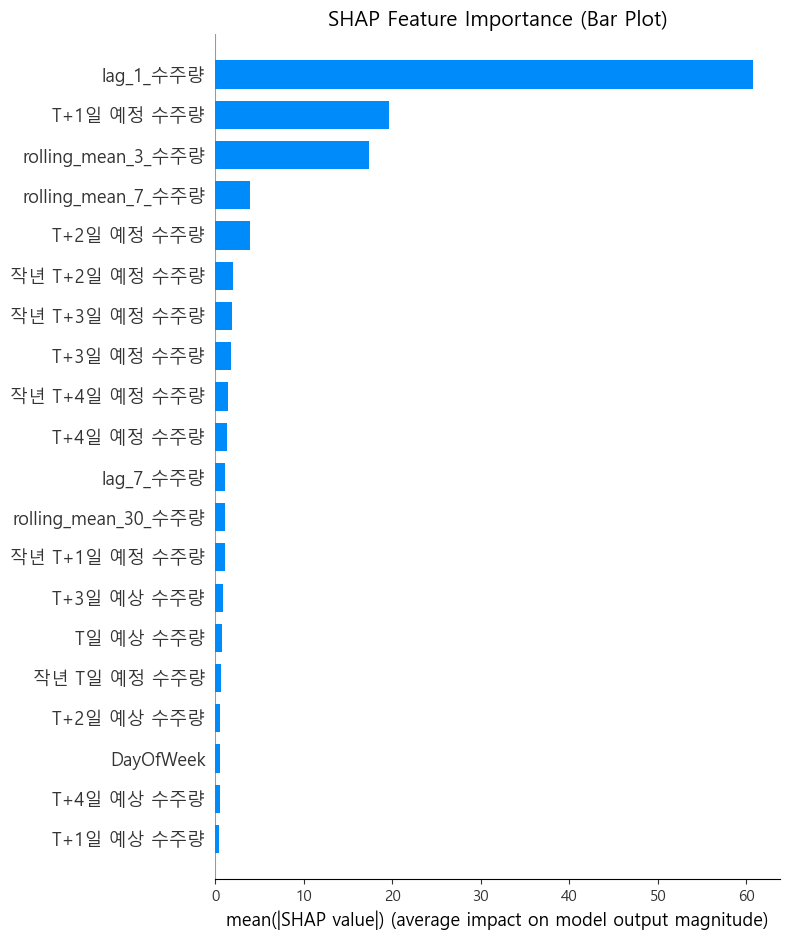

   (Ïù¥ ÌîåÎ°ØÏùÄ Í∞Å ÌîºÏ≤òÏùò SHAP Í∞íÏùò Ï†àÎåÄÍ∞í ÌèâÍ∑†ÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.)

3.3 SHAP Summary Plot ÏãúÍ∞ÅÌôî...


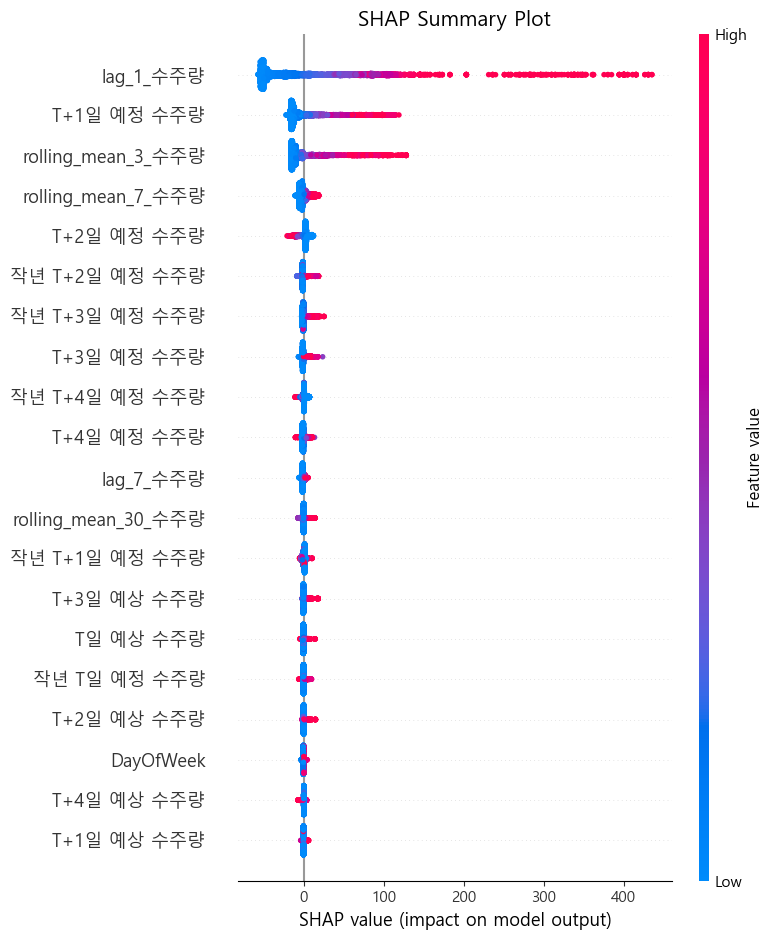

   (Ïù¥ ÌîåÎ°ØÏùÄ Í∞Å ÌîºÏ≤òÍ∞Ä ÏòàÏ∏°Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ•Ïùò ÌÅ¨Í∏∞ÏôÄ Î∞©Ìñ•ÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.)
   - Îπ®Í∞ÑÏÉâ: ÌîºÏ≤ò Í∞íÏù¥ ÎÜíÏùÑ Îïå ÏòàÏ∏°Í∞í ÏÉÅÏäπ
   - ÌååÎûÄÏÉâ: ÌîºÏ≤ò Í∞íÏù¥ ÎÇÆÏùÑ Îïå ÏòàÏ∏°Í∞í ÏÉÅÏäπ
   - Í∞ÄÎ°úÏ∂ï: SHAP Í∞í (ÏòàÏ∏°Í∞íÏóê ÎåÄÌïú Í∏∞Ïó¨ÎèÑ)
   - ÏÑ∏Î°úÏ∂ï: ÌîºÏ≤ò

3.4 ÌäπÏ†ï ÏòàÏ∏°Ïóê ÎåÄÌïú ÏßÄÏó≠Ï†Å ÌîºÏ≤ò ÏÑ§Î™Ö (Force Plot)...
   ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Ïùò 1Î≤àÏß∏ ÏÉòÌîåÏóê ÎåÄÌïú Force Plot:


   (Force PlotÏùÄ 1Î≤àÏß∏ ÏòàÏ∏°Í∞íÏù¥ ÌèâÍ∑† ÏòàÏ∏°Í∞íÏóêÏÑú Ïñ¥ÎñªÍ≤å Î≤óÏñ¥ÎÇ¨ÎäîÏßÄ Í∞Å ÌîºÏ≤òÏùò Í∏∞Ïó¨ÎèÑÎ•º Î≥¥Ïó¨Ï§çÎãàÎã§.)

3.5 Í∞úÎ≥Ñ ÌîºÏ≤òÏùò ÏòàÏ∏° ÏòÅÌñ• ÏãúÍ∞ÅÌôî (Dependency Plot)...
   - 'lag_1_ÏàòÏ£ºÎüâ' ÌîºÏ≤òÏóê ÎåÄÌïú Dependency Plot:


<Figure size 800x600 with 0 Axes>

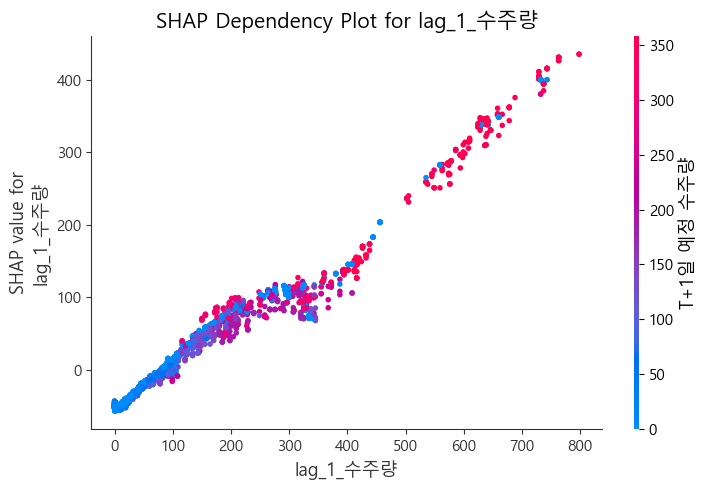

     (Ïù¥ ÌîåÎ°ØÏùÄ 'lag_1_ÏàòÏ£ºÎüâ' ÌîºÏ≤ò Í∞íÏù¥ Î≥ÄÌï®Ïóê Îî∞Îùº ÏòàÏ∏°Í∞íÏù¥ Ïñ¥ÎñªÍ≤å Î≥ÄÌïòÍ≥†, Îã§Î•∏ ÌîºÏ≤òÏôÄ Ïñ¥ÎñªÍ≤å ÏÉÅÌò∏ÏûëÏö©ÌïòÎäîÏßÄ Î≥¥Ïó¨Ï§çÎãàÎã§.)
   - 'T+1Ïùº ÏòàÏ†ï ÏàòÏ£ºÎüâ' ÌîºÏ≤òÏóê ÎåÄÌïú Dependency Plot:


<Figure size 800x600 with 0 Axes>

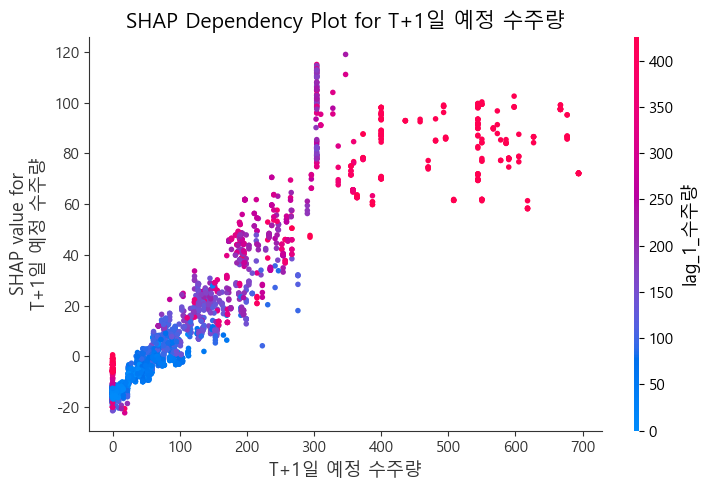

     (Ïù¥ ÌîåÎ°ØÏùÄ 'T+1Ïùº ÏòàÏ†ï ÏàòÏ£ºÎüâ' ÌîºÏ≤ò Í∞íÏù¥ Î≥ÄÌï®Ïóê Îî∞Îùº ÏòàÏ∏°Í∞íÏù¥ Ïñ¥ÎñªÍ≤å Î≥ÄÌïòÍ≥†, Îã§Î•∏ ÌîºÏ≤òÏôÄ Ïñ¥ÎñªÍ≤å ÏÉÅÌò∏ÏûëÏö©ÌïòÎäîÏßÄ Î≥¥Ïó¨Ï§çÎãàÎã§.)
   - 'rolling_mean_3_ÏàòÏ£ºÎüâ' ÌîºÏ≤òÏóê ÎåÄÌïú Dependency Plot:


<Figure size 800x600 with 0 Axes>

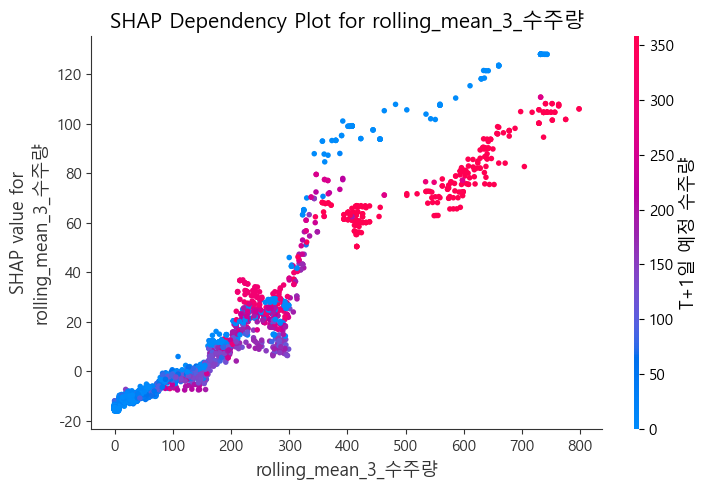

     (Ïù¥ ÌîåÎ°ØÏùÄ 'rolling_mean_3_ÏàòÏ£ºÎüâ' ÌîºÏ≤ò Í∞íÏù¥ Î≥ÄÌï®Ïóê Îî∞Îùº ÏòàÏ∏°Í∞íÏù¥ Ïñ¥ÎñªÍ≤å Î≥ÄÌïòÍ≥†, Îã§Î•∏ ÌîºÏ≤òÏôÄ Ïñ¥ÎñªÍ≤å ÏÉÅÌò∏ÏûëÏö©ÌïòÎäîÏßÄ Î≥¥Ïó¨Ï§çÎãàÎã§.)

--- [SHAP Î∂ÑÏÑù ÏôÑÎ£å] ---


In [20]:
# %% [markdown]
# ## 3. SHAP (SHapley Additive exPlanations) Î∂ÑÏÑù
# - ÌïôÏäµÎêú LightGBM Î™®Îç∏Ïùò ÌîºÏ≤ò Ï§ëÏöîÎèÑÎ•º SHAP Í∞íÏùÑ ÌÜµÌï¥ Î∂ÑÏÑùÌï©ÎãàÎã§.
# - Ï†ÑÏ≤¥ ÌîºÏ≤òÏùò Ï†ÑÏó≠Ï†Å Ï§ëÏöîÎèÑ Î∞è ÌäπÏ†ï ÏòàÏ∏°Ïóê ÎåÄÌïú ÏßÄÏó≠Ï†Å ÏÑ§Î™ÖÏùÑ ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.

# %%
print("\n--- [3. SHAP Î∂ÑÏÑù ÏãúÏûë] ---")

if 'final_model' not in locals() or final_model is None:
    print("üö® 'final_model'Ïù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§. Ïù¥Ï†Ñ Optuna ÌäúÎãù Îã®Í≥ÑÎ•º Î®ºÏ†Ä Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî.")
elif 'X_test' not in locals() or X_test is None:
    print("üö® 'X_test' Îç∞Ïù¥ÌÑ∞Í∞Ä Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§. Ïù¥Ï†Ñ Optuna ÌäúÎãù Îã®Í≥ÑÎ•º Î®ºÏ†Ä Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî.")
else:
    print("3.1 SHAP Explainer ÏÉùÏÑ± Î∞è SHAP Í∞í Í≥ÑÏÇ∞...")
    # LightGBM Î™®Îç∏Ïóê ÎåÄÌïú SHAP Explainer ÏÉùÏÑ±
    explainer = shap.TreeExplainer(final_model, X_train)

    # ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Ïóê ÎåÄÌïú SHAP Í∞í Í≥ÑÏÇ∞
    shap_values = explainer.shap_values(X_test)
    print("   SHAP Í∞í Í≥ÑÏÇ∞ ÏôÑÎ£å.")

    # --- 3.2 Ï†ÑÏó≠Ï†Å ÌîºÏ≤ò Ï§ëÏöîÎèÑ Î∂ÑÏÑù (Global Feature Importance) ---

    # 1) Bar PlotÏúºÎ°ú ÌîºÏ≤ò Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
    print("\n3.2 Ï†ÑÏó≠Ï†Å ÌîºÏ≤ò Ï§ëÏöîÎèÑ (Global Feature Importance) ÏãúÍ∞ÅÌôî (Bar Plot)...")
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
    plt.title('SHAP Feature Importance (Bar Plot)', fontsize=15)
    plt.tight_layout()
    plt.show()
    print("   (Ïù¥ ÌîåÎ°ØÏùÄ Í∞Å ÌîºÏ≤òÏùò SHAP Í∞íÏùò Ï†àÎåÄÍ∞í ÌèâÍ∑†ÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.)")

    # 2) Summary PlotÏúºÎ°ú ÌîºÏ≤ò ÏòÅÌñ• Î∞©Ìñ• ÏãúÍ∞ÅÌôî
    print("\n3.3 SHAP Summary Plot ÏãúÍ∞ÅÌôî...")
    plt.figure(figsize=(12, 10))
    shap.summary_plot(shap_values, X_test, show=False)
    plt.title('SHAP Summary Plot', fontsize=15)
    plt.tight_layout()
    plt.show()
    print("   (Ïù¥ ÌîåÎ°ØÏùÄ Í∞Å ÌîºÏ≤òÍ∞Ä ÏòàÏ∏°Ïóê ÎØ∏ÏπòÎäî ÏòÅÌñ•Ïùò ÌÅ¨Í∏∞ÏôÄ Î∞©Ìñ•ÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.)")
    print("   - Îπ®Í∞ÑÏÉâ: ÌîºÏ≤ò Í∞íÏù¥ ÎÜíÏùÑ Îïå ÏòàÏ∏°Í∞í ÏÉÅÏäπ")
    print("   - ÌååÎûÄÏÉâ: ÌîºÏ≤ò Í∞íÏù¥ ÎÇÆÏùÑ Îïå ÏòàÏ∏°Í∞í ÏÉÅÏäπ")
    print("   - Í∞ÄÎ°úÏ∂ï: SHAP Í∞í (ÏòàÏ∏°Í∞íÏóê ÎåÄÌïú Í∏∞Ïó¨ÎèÑ)")
    print("   - ÏÑ∏Î°úÏ∂ï: ÌîºÏ≤ò")


    # --- 3.4 ÏßÄÏó≠Ï†Å ÌîºÏ≤ò ÏÑ§Î™Ö Î∂ÑÏÑù (Local Explanation) ---
    print("\n3.4 ÌäπÏ†ï ÏòàÏ∏°Ïóê ÎåÄÌïú ÏßÄÏó≠Ï†Å ÌîºÏ≤ò ÏÑ§Î™Ö (Force Plot)...")
    
    # ÏòàÏãú: ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Ïùò Ï≤´ Î≤àÏß∏ ÏÉòÌîåÏóê ÎåÄÌïú ÏòàÏ∏° ÏÑ§Î™Ö
    sample_idx = 0 
    print(f"   ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Ïùò {sample_idx+1}Î≤àÏß∏ ÏÉòÌîåÏóê ÎåÄÌïú Force Plot:")
    
    # base_valueÎäî Î™®Îç∏Ïùò ÌèâÍ∑† ÏòàÏ∏°Í∞í
    base_value = explainer.expected_value[0] if isinstance(explainer.expected_value, list) else explainer.expected_value
    
    # force plot (JavaScript Î†åÎçîÎßÅÏù¥ ÌïÑÏöîÌïòÎØÄÎ°ú Ïõπ ÌôòÍ≤ΩÏóêÏÑú Ïûò Î≥¥ÏûÑ)
    shap.initjs() # Jupyter Notebook/Lab ÌôòÍ≤ΩÏóêÏÑú Ïã§Ìñâ Ïãú ÌïÑÏöî
    
    # ÌïòÎÇòÏùò ÏÉòÌîåÏóê ÎåÄÌïú Force Plot
    display(shap.force_plot(base_value, shap_values[sample_idx], X_test.iloc[sample_idx]))
    print(f"   (Force PlotÏùÄ {sample_idx+1}Î≤àÏß∏ ÏòàÏ∏°Í∞íÏù¥ ÌèâÍ∑† ÏòàÏ∏°Í∞íÏóêÏÑú Ïñ¥ÎñªÍ≤å Î≤óÏñ¥ÎÇ¨ÎäîÏßÄ Í∞Å ÌîºÏ≤òÏùò Í∏∞Ïó¨ÎèÑÎ•º Î≥¥Ïó¨Ï§çÎãàÎã§.)")

    # --- 3.5 Í∞úÎ≥Ñ ÌîºÏ≤òÏùò ÏùòÏ°¥ÏÑ± ÌîåÎ°Ø (Dependency Plot) ---
    print("\n3.5 Í∞úÎ≥Ñ ÌîºÏ≤òÏùò ÏòàÏ∏° ÏòÅÌñ• ÏãúÍ∞ÅÌôî (Dependency Plot)...")

    # Í∞ÄÏû• Ï§ëÏöîÌïú ÌîºÏ≤ò 3Í∞úÏóê ÎåÄÌïú Dependency Plot
    current_shap_values = shap_values[0] if isinstance(shap_values, list) else shap_values
    mean_abs_shap_values = np.abs(current_shap_values).mean(axis=0)
    top_features_indices = mean_abs_shap_values.argsort()[-3:][::-1] # ÏÉÅÏúÑ 3Í∞ú ÌîºÏ≤ò Ïù∏Îç±Ïä§
    top_features_names = X_test.columns[top_features_indices]

    for feature in top_features_names:
        print(f"   - '{feature}' ÌîºÏ≤òÏóê ÎåÄÌïú Dependency Plot:")
        plt.figure(figsize=(8, 6))
        shap.dependence_plot(feature, current_shap_values, X_test, interaction_index="auto", show=False)
        plt.title(f'SHAP Dependency Plot for {feature}', fontsize=15)
        plt.tight_layout()
        plt.show()
        print(f"     (Ïù¥ ÌîåÎ°ØÏùÄ '{feature}' ÌîºÏ≤ò Í∞íÏù¥ Î≥ÄÌï®Ïóê Îî∞Îùº ÏòàÏ∏°Í∞íÏù¥ Ïñ¥ÎñªÍ≤å Î≥ÄÌïòÍ≥†, Îã§Î•∏ ÌîºÏ≤òÏôÄ Ïñ¥ÎñªÍ≤å ÏÉÅÌò∏ÏûëÏö©ÌïòÎäîÏßÄ Î≥¥Ïó¨Ï§çÎãàÎã§.)")

    print("\n--- [SHAP Î∂ÑÏÑù ÏôÑÎ£å] ---")